In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df =sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:

df1 =pd.get_dummies(df,drop_first =True)
df1

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,1,0,...,0,0,0,0,0,0,0,1,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [6]:
df1.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1'],
      dtype='object')

In [7]:
y=df1.price
x=df1.drop('price',axis =1)

In [8]:
model =LinearRegression()

In [9]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.25,random_state =True)
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)


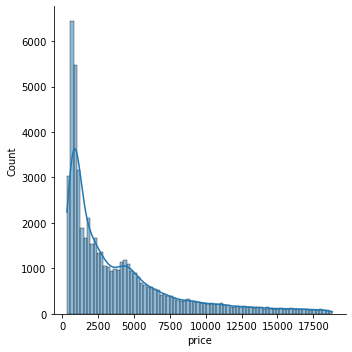

In [11]:
sns.displot(df1.price,kde=True)

In [12]:
# Train with LOG Price

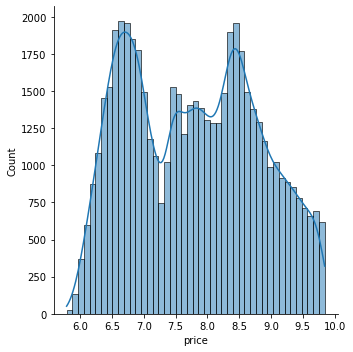

In [14]:
log_price =np.log(df1.price)
sns.displot(log_price,kde=True)

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
pricepredict_y_train= model.predict(x_train)
f_pred = model.predict(x_test)

In [17]:
print("MSE final is",mean_squared_error(y_test,f_pred))
print("RMSE final is",np.sqrt(mean_squared_error(y_test,f_pred)))
print("Rsquare is",r2_score(y_test,f_pred))

MSE final is 1204651.9849121727
RMSE final is 1097.5663920292807
Rsquare is 0.9220916395098715


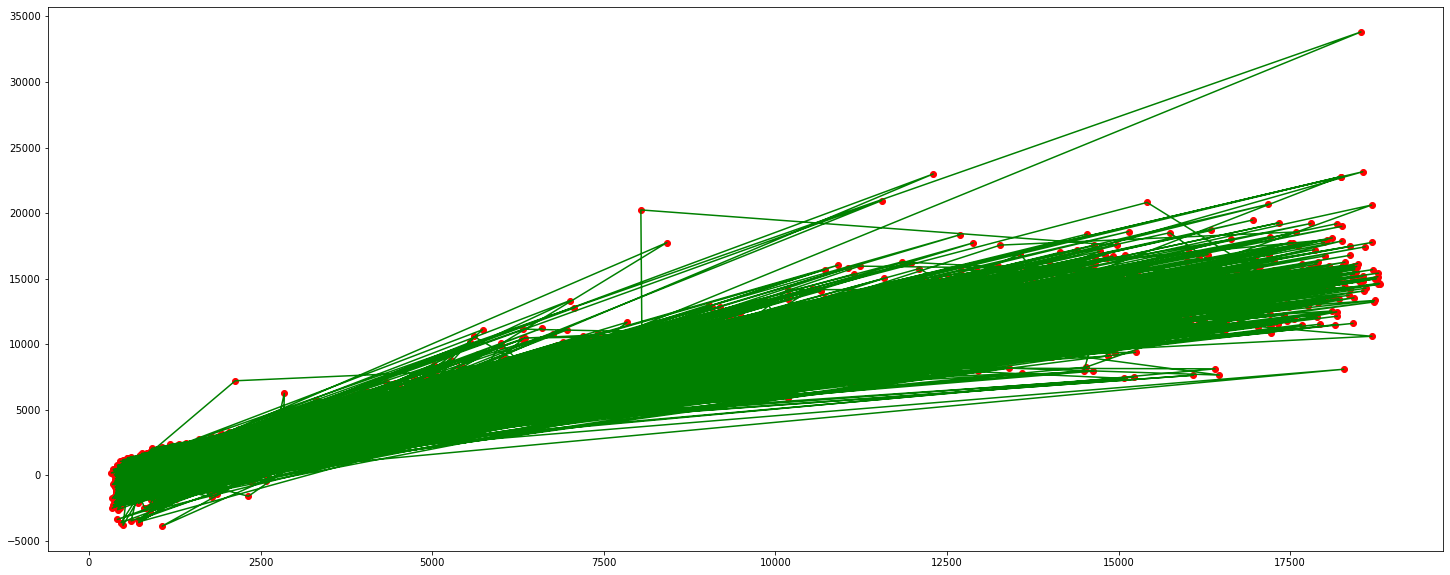

In [18]:
# plotting Regression line
plt.figure(figsize=(25,10))
plt.plot(y_test,f_pred,color='g')
#plot all test points
plt.scatter(y_test,f_pred,color='r')


In [19]:
#after droping y and z columns
y2=df1.price
x2=df1.drop(['price','y','z','table'],axis =1)
x2_train,x2_test,y2_train,y2_test =train_test_split(x2,y2,test_size =0.25,random_state=True)
sc=StandardScaler()
sc.fit(x2_train)
x2_train=sc.transform(x2_train)
x2_test=sc.transform(x2_test)



In [20]:
model.fit(x2_train,y2_train)
pricepredict_y_train2= model.predict(x2_train)
f_pred2 = model.predict(x2_test)
print("MSE2 final is",mean_squared_error(y2_test,f_pred2))
print("RMSE final is",np.sqrt(mean_squared_error(y2_test,f_pred2)))
print("Rsquare2 is",r2_score(y2_test,f_pred2))

MSE2 final is 1207475.375674201
RMSE final is 1098.8518442784728
Rsquare2 is 0.9219090425872353


# dropping cut  ,color,clarity

In [21]:
y1=df.price
x1=df.drop(['price','cut','color','clarity'],axis =1)
x1
y1

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [22]:
x1_train,x1_test,y1_train,y1_test =train_test_split(x1,y1,test_size =0.25,random_state=True)
sc=StandardScaler()
sc.fit(x1_train)
x1_train=sc.transform(x1_train)
x1_test=sc.transform(x1_test)

In [23]:
model.fit(x1_train,y1_train)

LinearRegression()

In [24]:
finalpricepredict2 =model.predict(x1_test)

In [25]:
print(finalpricepredict2)

[ 778.42235621 6930.46053685 2520.12128307 ... 5456.49180326 3630.17181904
 1203.67470294]


In [26]:
print("MSE final is",mean_squared_error(y1_test,finalpricepredict2))
print("RMSE final is",np.sqrt(mean_squared_error(y1_test,finalpricepredict2)))
print("Rsquare is",r2_score(y1_test,finalpricepredict2))

MSE final is 2140750.137628497
RMSE final is 1463.1302531314486
Rsquare is 0.8615514393114848


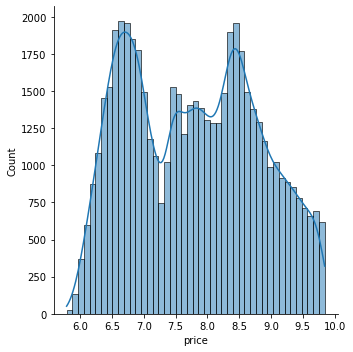

In [29]:
log_price =np.log(df1.price)
sns.displot(log_price,kde=True)

MSE final is 0.02487154423515019
RMSE final is 0.15770714706426653
Rsquare is 0.9753594221655613


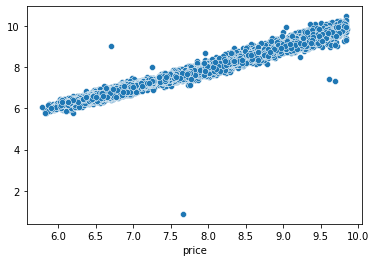

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,1,0,...,0,0,0,0,0,0,0,1,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [30]:
# performing with LOg Price    # DONE with categoric and numeric both

y3=log_price
x3=df1.drop(['price','y','z','table'],axis =1)

x3_train,x3_test,y3_train,y3_test =train_test_split(x3,y3,test_size =0.25,random_state=True)
sc=StandardScaler()
sc.fit(x3_train)
x3_train=sc.transform(x3_train)
x3_test=sc.transform(x3_test)


model.fit(x3_train,y3_train)
finalpricepredict3 =model.predict(x3_test)


print("MSE final is",mean_squared_error(y3_test,finalpricepredict3))
print("RMSE final is",np.sqrt(mean_squared_error(y3_test,finalpricepredict3)))
print("Rsquare is",r2_score(y3_test,finalpricepredict3))

sns.scatterplot(x=y3_test ,y=finalpricepredict3)
plt.show()

df1


### Another approach

In [35]:
dmnd =sns.load_dataset('Diamonds')

In [36]:
dmnd

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
object_cols =dmnd.select_dtypes(include ='object')
numeric_cols=dmnd.select_dtypes(exclude='object')
object_cols
numeric_cols

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [38]:
cat_vars=pd.get_dummies(object_cols)
cat_vars

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [39]:
dmnd.groupby('cut').agg({'price':np.mean,'cut':np.size})

,price,cut
cut,,
Fair,4358.757764,1610
Good,3928.864452,4906
Ideal,3457.541970,21551
Premium,4584.257704,13791
Very Good,3981.759891,12082


In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd as pst

**So we grup different categories which accepts nulls hypothesis by performing pairwisetuckey HSD Test**

In [41]:
print(pst(dmnd.price,dmnd.cut,alpha =0.05))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
   Fair      Good -429.8933 0.0015  -740.4593 -119.3273   True
   Fair     Ideal -901.2158   -0.0 -1180.5808 -621.8507   True
   Fair   Premium  225.4999 0.1951   -59.2763  510.2762  False
   Fair Very Good -376.9979 0.0031  -663.8719  -90.1239   True
   Good     Ideal -471.3225   -0.0  -642.3685 -300.2765   True
   Good   Premium  655.3933   -0.0   475.6451  835.1414   True
   Good Very Good   52.8954 0.9341  -130.1581  235.9489  False
  Ideal   Premium 1126.7157   -0.0  1008.8048 1244.6267   True
  Ideal Very Good  524.2179   -0.0    401.327  647.1088   True
Premium Very Good -602.4978   -0.0  -737.2377 -467.7579   True
--------------------------------------------------------------


In [43]:
dmnd.cut=dmnd['cut'].replace({'fair':'Premium','Very Good':'Good'})
dmnd

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [44]:
dmnd.groupby('color').agg({'price':np.mean})

,price
color,
D,3169.954096
E,3076.752475
F,3724.886397
G,3999.135671
H,4486.669196
I,5091.874954
J,5323.818020


In [45]:
dmnd.groupby('color')['price'].mean()

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [46]:
print(pst(dmnd.price,dmnd.color,alpha=0.05))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     D      E  -93.2016 0.7437 -276.1437   89.7404  False
     D      F  554.9323   -0.0  370.9936   738.871   True
     D      G  829.1816   -0.0  651.2593 1007.1038   True
     D      H 1316.7151   -0.0 1127.1688 1506.2614   True
     D      I 1921.9209   -0.0 1710.9515 2132.8902   True
     D      J 2153.8639   -0.0 1894.0127 2413.7152   True
     E      F  648.1339   -0.0  481.6095  814.6584   True
     E      G  922.3832   -0.0  762.5293 1082.2371   True
     E      H 1409.9167   -0.0 1237.2183 1582.6151   True
     E      I 2015.1225   -0.0 1819.1505 2211.0945   True
     E      J 2247.0655   -0.0 1999.2357 2494.8954   True
     F      G  274.2493    0.0  113.2557  435.2428   True
     F      H  761.7828   -0.0   588.029  935.5366   True
     F      I 1366.9886   -0.0 1170.0859 1563.8913   True
     F      J 

In [223]:
dmnd.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [270]:
dmnd.sample(5).index

Int64Index([18047, 4641, 17112, 47949, 46777], dtype='int64')